# Analysis of last.fm reports

Now we'll analyze the stats for my user, `fergomes`.

The first thing you need to do to perform this study is collect all the tracks for your user (or whatever user you want to analyze). This can be done running the python script `lastfm_get_user_historical_tracks.py` on this repo (go to the repo main page and go through the README).

For those who are not familiar, Last.fm is a service that collects and stores what you listen to on many devices. I use the service since 2006, and I had several connectors in the past, including Winamp!

On last.fm dialect, a `scrobble` is a unique track that was listened to on a period of time, and transferred to the platform.

To know more about the platform, check https://www.last.fm/.
If you feel interested on using the service but doesn't know how to scrobble your tracks, check here: https://www.last.fm/about/trackmymusic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import datetime

In [2]:
user = 'fergomes'

if user == 'fergomes':
    directory = 'export_fergomes_20191109'
    file = 'historical_tracks_fergomes_201911091749.csv'

scrobbles_df = pd.read_csv(directory + '/' + file, sep=',')
scrobbles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74422 entries, 0 to 74421
Data columns (total 7 columns):
Unnamed: 0    74422 non-null int64
Timestamp     74422 non-null int64
Artist        74422 non-null object
Track         74422 non-null object
Album         72066 non-null object
Loved         74422 non-null int64
Tags          74422 non-null object
dtypes: int64(3), object(4)
memory usage: 4.0+ MB


In [3]:
import datetime
from pytz import timezone

br = timezone('America/Sao_Paulo')
sp = timezone('Europe/Madrid')

date_moved = int(datetime.datetime(2017,2,6,0,0).timestamp())

list_date_formatted = []

for i in range(len(scrobbles_df)):
    date_epoch = int(scrobbles_df.iloc[i]['Timestamp'])
    if user == 'fergomes' and int(date_epoch) > date_moved:
        date_f = datetime.datetime.fromtimestamp(int(date_epoch), tz=sp)
    else:
        date_f = datetime.datetime.fromtimestamp(int(date_epoch), tz=br)
    list_date_formatted.append(date_f)

scrobbles_df['Date formatted'] = list_date_formatted
scrobbles_df['Weekday'] = [datetime.date(idx.year, idx.month, idx.day).strftime('%A') for idx in scrobbles_df['Date formatted']]
scrobbles_df['Weekday_number'] = [datetime.date(idx.year, idx.month, idx.day).isoweekday() for idx in scrobbles_df['Date formatted']]
scrobbles_df['Hour'] = [idx.hour for idx in scrobbles_df['Date formatted']]
scrobbles_df['Month'] = [idx.month for idx in scrobbles_df['Date formatted']]
scrobbles_df['Year'] = [idx.year for idx in scrobbles_df['Date formatted']]

In [4]:
scrobbles_df.head(20)

,Unnamed: 0,Timestamp,Artist,Track,Album,Loved,Tags,Date formatted,Weekday,Weekday_number,Hour,Month,Year
0,0,1573238984,Travis,Turn,The Man Who,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:49:44+01:00,Friday,5,19,11,2019
1,1,1573238758,Travis,The Beautiful Occupation,12 Memories,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:45:58+01:00,Friday,5,19,11,2019
2,2,1573238524,Travis,All I Want To Do Is Rock,Good Feeling,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:42:04+01:00,Friday,5,19,11,2019
3,3,1573238268,Travis,Happy,Good Feeling,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:37:48+01:00,Friday,5,19,11,2019
4,4,1573238027,Travis,U16 Girls,Good Feeling,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:33:47+01:00,Friday,5,19,11,2019
5,5,1573237787,Travis,Side,The Invisible Band,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:29:47+01:00,Friday,5,19,11,2019
6,6,1573237550,Travis,More Than Us,Good Feeling,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:25:50+01:00,Friday,5,19,11,2019
7,7,1573237330,Travis,Love Will Come Through,12 Memories,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:22:10+01:00,Friday,5,19,11,2019
8,8,1573237107,Travis,Flowers in the Window,The Invisible Band,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:18:27+01:00,Friday,5,19,11,2019
9,9,1573236918,Travis,Tied To The 90's,Good Feeling,0,"['britpop', 'indie', 'rock', 'alternative', 'b...",2019-11-08 19:15:18+01:00,Friday,5,19,11,2019


## Top 10 everything!

First, let's build simple charts with top 10 artists, albums, tracks and tags for the whole period.

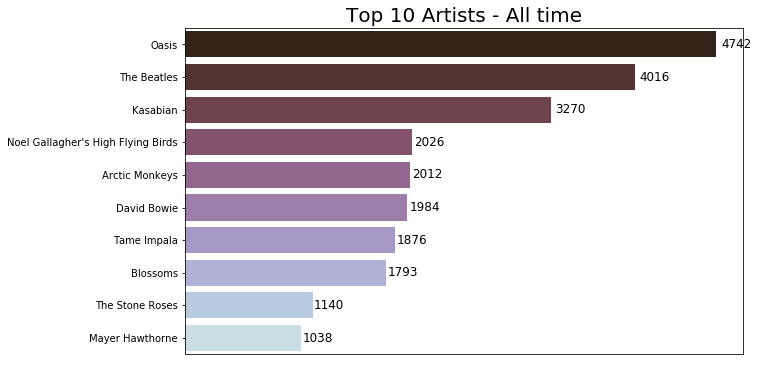

In [5]:
top_artists = Counter(scrobbles_df['Artist'])
top_100_artists = top_artists.most_common(100)

x_artists = [item[0] for item in top_100_artists]
y_artists = [item[1] for item in top_100_artists]


plt.subplots(figsize=(10, 6))

palette = sns.cubehelix_palette(10, start=1.5, rot=-.75, reverse=True)

artists_plot = sns.barplot(y_artists[:10], x_artists[:10], palette=palette)
artists_plot.axes.get_xaxis().set_visible(False)
artists_plot.set_title('Top 10 Artists - All time', fontsize=20)
for p in artists_plot.patches:
    artists_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

    top_albums = Counter(scrobbles_df['Album'])

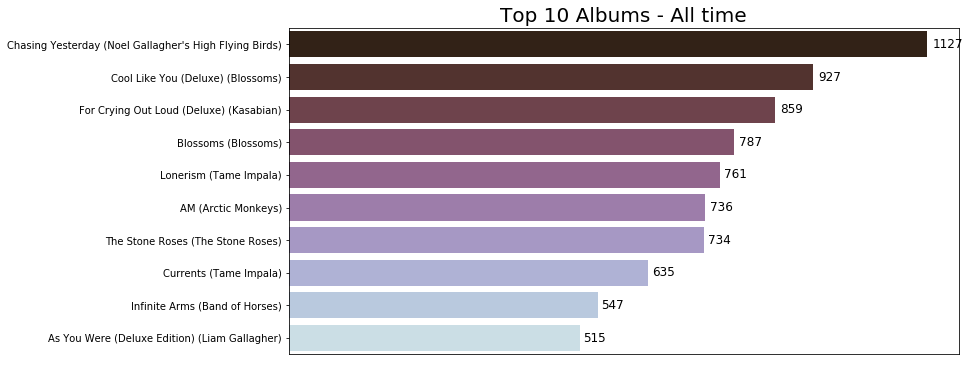

In [6]:
top_albums = Counter(scrobbles_df['Album'])
top_100_albums = top_albums.most_common(100)

x_albums = [item[0] for item in top_100_albums]
y_albums = [item[1] for item in top_100_albums]

x_albums_with_artist = []
for i in range(len(x_albums)):
    try:
        album = x_albums[i]
        artist = scrobbles_df[scrobbles_df.Album == album]['Artist'].mode()[0]
        album_artist = album + " (" + artist + ")"
        x_albums_with_artist.append(album_artist)
    except: x_albums_with_artist.append("nan")

plt.subplots(figsize=(12, 6))
albums_plot = sns.barplot(y_albums[1:11], x_albums_with_artist[1:11], palette=palette)
albums_plot.axes.get_xaxis().set_visible(False)
albums_plot.set_title('Top 10 Albums - All time', fontsize=20)
for p in albums_plot.patches:
    albums_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

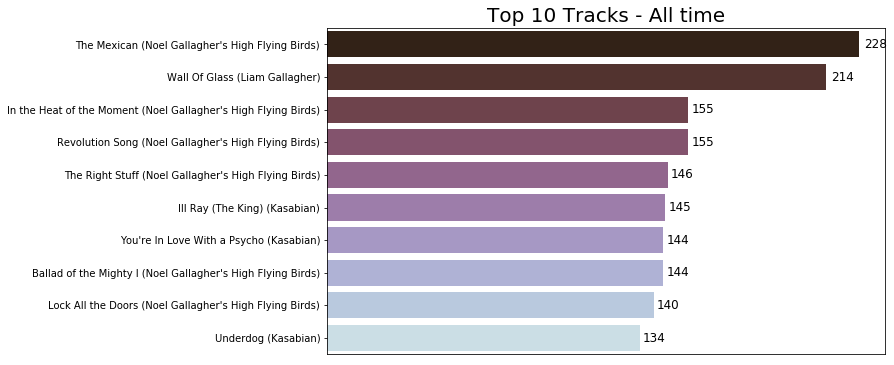

In [7]:
top_tracks = Counter(scrobbles_df['Track'])
top_100_tracks = top_tracks.most_common(100)

x_tracks = [item[0] for item in top_100_tracks]
y_tracks = [item[1] for item in top_100_tracks]


x_tracks_with_artist = []
for i in range(len(x_albums)):
    try:
        track = x_tracks[i]
        artist = scrobbles_df[scrobbles_df.Track == track]['Artist'].mode()[0]
        track_artist = track + " (" + artist + ")"
        x_tracks_with_artist.append(track_artist)
    except: x_tracks_with_artist.append("nan")
        
        
plt.subplots(figsize=(10, 6))
tracks_plot = sns.barplot(y_tracks[:10], x_tracks_with_artist[:10], palette=palette)
tracks_plot.axes.get_xaxis().set_visible(False)
tracks_plot.set_title('Top 10 Tracks - All time', fontsize=20)
for p in tracks_plot.patches:
    tracks_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

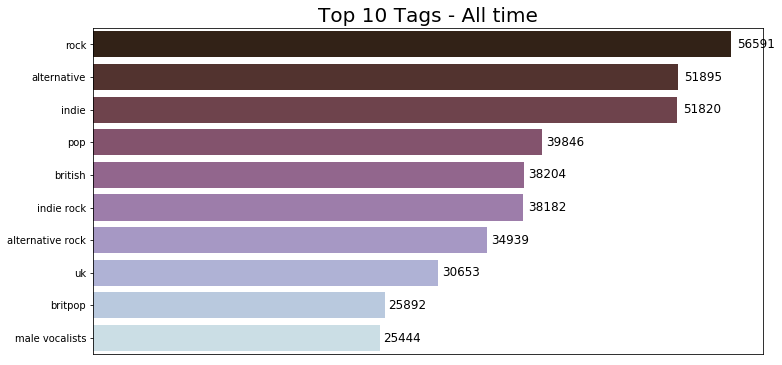

In [8]:
tags_df = scrobbles_df['Tags']
count_tags = {}

for i in range(len(scrobbles_df)):
    str1 = tags_df.iloc[i]
    str1 = str1.replace("[","").replace("]","").replace("'","")
    str1 = str1.split(", ")
    for j in range(len(str1)):
        if str1[j] not in count_tags:
            count_tags[str1[j]] = 1
        elif str1[j] in count_tags:
            count_tags[str1[j]] += 1
            
top_tags = Counter(count_tags)
top_100_tags = top_tags.most_common(100)

x_tags = [item[0] for item in top_100_tags]
y_tags = [item[1] for item in top_100_tags]

plt.subplots(figsize=(12, 6))
tags_plot = sns.barplot(y_tags[:10], x_tags[:10], palette = palette)
tags_plot.axes.get_xaxis().set_visible(False)
tags_plot.set_title('Top 10 Tags - All time', fontsize=20)
for p in tags_plot.patches:
    tags_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

### Last week and Last month comparisons

This is another very basic comparison, but anyway let's do it.

In [9]:
import datetime

today = scrobbles_df.iloc[0]['Date formatted']

week = datetime.timedelta(days=7)
last_week = today - week
two_weeks_ago = last_week - week

In [10]:
last_week_scrobbles = scrobbles_df[scrobbles_df['Date formatted'] > last_week]

two_weeks_ago_scrobbles = scrobbles_df[scrobbles_df['Date formatted'] < last_week]
two_weeks_ago_scrobbles = two_weeks_ago_scrobbles[two_weeks_ago_scrobbles['Date formatted'] > two_weeks_ago]

weekly_scrobbles = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_scrobbles),
                    last_week.strftime('%m/%d'): len(last_week_scrobbles)}

In [11]:
last_week_artists = pd.unique(last_week_scrobbles['Artist'])
two_weeks_ago_artists = pd.unique(two_weeks_ago_scrobbles['Artist'])

weekly_artists = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_artists),
                  last_week.strftime('%m/%d'): len(last_week_artists)}

In [12]:
last_week_albums = pd.unique(last_week_scrobbles['Album'])
two_weeks_ago_albums = pd.unique(two_weeks_ago_scrobbles['Album'])

weekly_albums = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_albums),
                 last_week.strftime('%m/%d'): len(last_week_albums)}

Text(0.5, 1.0, '# of albums - WoW')

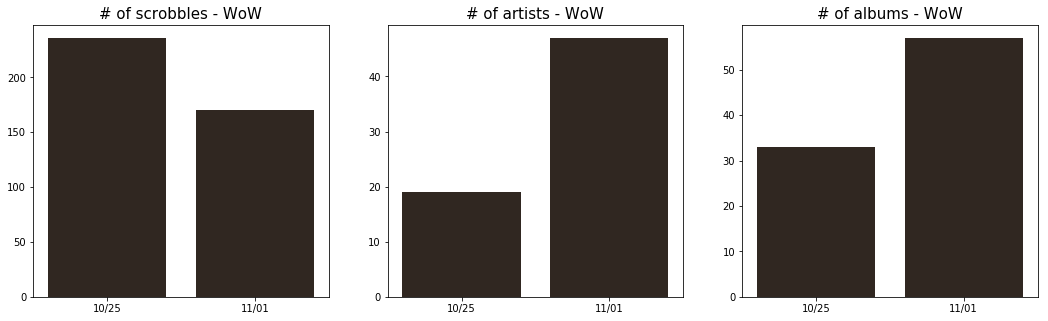

In [13]:
plt.subplots(figsize=(18, 5))

plt.subplot(1, 3, 1)
lists = weekly_scrobbles.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#32271e')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of scrobbles - WoW', fontsize=15)

plt.subplot(1, 3, 2)
lists = weekly_artists.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#32271e')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of artists - WoW', fontsize=15)

plt.subplot(1, 3, 3)
lists = weekly_albums.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#32271e')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of albums - WoW', fontsize=15)

In [14]:
month = datetime.timedelta(days=30)
last_month = today - month
two_months_ago = last_month - month

In [15]:
last_month_scrobbles = scrobbles_df[scrobbles_df['Date formatted'] > last_month]

two_months_ago_scrobbles = scrobbles_df[scrobbles_df['Date formatted'] < last_month]
two_months_ago_scrobbles = two_months_ago_scrobbles[two_months_ago_scrobbles['Date formatted'] > two_months_ago]

monthly_scrobbles = {two_months_ago.strftime('%m/%d'): len(two_months_ago_scrobbles),
                     last_month.strftime('%m/%d'): len(last_month_scrobbles)}

In [16]:
last_month_artists = pd.unique(last_month_scrobbles['Artist'])
two_months_ago_artists = pd.unique(two_months_ago_scrobbles['Artist'])

monthly_artists = {two_months_ago.strftime('%m/%d'): len(two_months_ago_artists),
                   last_month.strftime('%m/%d'): len(last_month_artists)}

In [17]:
last_month_albums = pd.unique(last_month_scrobbles['Album'])
two_months_ago_albums = pd.unique(two_months_ago_scrobbles['Album'])

monthly_albums = {two_months_ago.strftime('%m/%d'): len(two_months_ago_albums),
                  last_month.strftime('%m/%d'): len(last_month_albums)}

Text(0.5, 1.0, '# of albums - MoM')

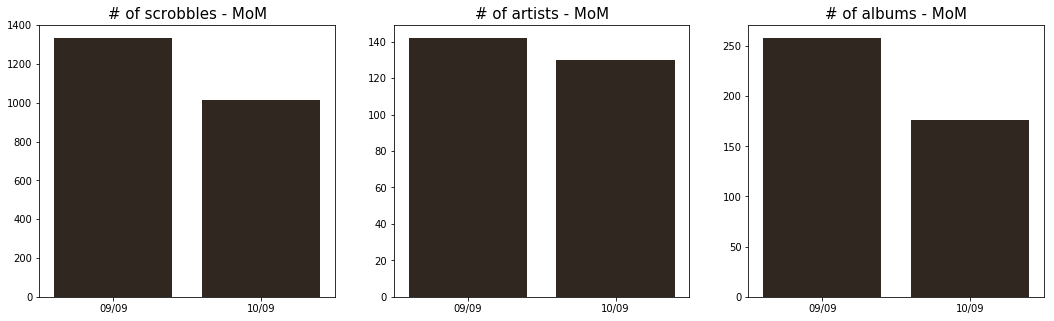

In [18]:
plt.subplots(figsize=(18, 5))

plt.subplot(1, 3, 1)
lists = monthly_scrobbles.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#32271e')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of scrobbles - MoM', fontsize=15)

plt.subplot(1, 3, 2)
lists = monthly_artists.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#32271e')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of artists - MoM', fontsize=15)

plt.subplot(1, 3, 3)
lists = monthly_albums.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#32271e')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of albums - MoM', fontsize=15)

## How concentrated is my taste?

Let's check the distribution of artists, albums and tracks, to see if I listen too much of one thing in regard os others.

We'll consider just the top 100 of each item, to keep the charts clean.

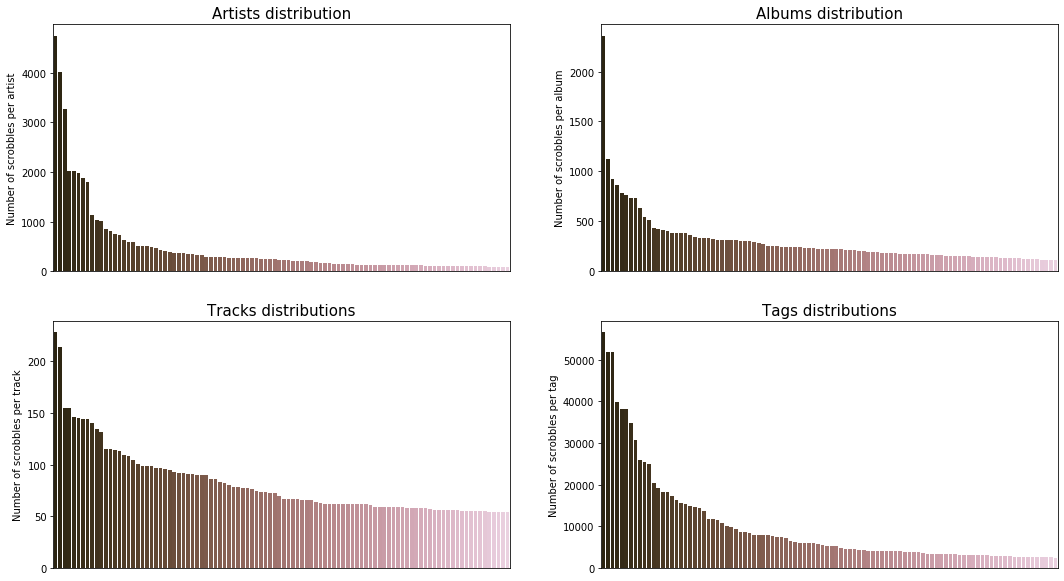

In [19]:
palette_conc = sns.cubehelix_palette(100, start=1.5, rot=-.35, reverse=True)
plt.subplots(figsize=(18, 10))

plt.subplot(2, 2, 1)
artists_dist = sns.barplot(x_artists, y_artists, palette = palette_conc)
plt.setp(artists_dist.patches, linewidth=0.05)
artists_dist.set_ylabel("Number of scrobbles per artist")
artists_dist.axes.get_xaxis().set_visible(False)
artists_dist.set_title('Artists distribution', fontsize=15)

plt.subplot(2, 2, 2)
albums_dist = sns.barplot(x_albums_with_artist, y_albums, palette = palette_conc)
plt.setp(albums_dist.patches, linewidth=0.05)
albums_dist.set_ylabel("Number of scrobbles per album")
albums_dist.axes.get_xaxis().set_visible(False)
albums_dist.set_title('Albums distribution', fontsize=15)

plt.subplot(2, 2, 3)
tracks_dist = sns.barplot(x_tracks_with_artist, y_tracks, palette = palette_conc)
plt.setp(tracks_dist.patches, linewidth=0.05)
tracks_dist.set_ylabel("Number of scrobbles per track")
tracks_dist.axes.get_xaxis().set_visible(False)
tracks_dist.set_title('Tracks distributions', fontsize=15)

plt.subplot(2, 2, 4)
tags_dist = sns.barplot(x_tags, y_tags, palette = palette_conc)
plt.setp(tags_dist.patches, linewidth=0.05)
tags_dist.set_ylabel("Number of scrobbles per tag")
tags_dist.axes.get_xaxis().set_visible(False)
tags_dist.set_title('Tags distributions', fontsize=15)

plt.show()

So, I have a high concentration of artists and tags (the curves are more dramatic), however the distribution on albums and tracks are smoother. The albums and tracks are more evenly distributed however they are albums from the same artists. (To be studied)

_Soundtrack for this first part of the study: [The Kinks](https://open.spotify.com/user/ohhrosie/playlist/4bW4B1ZAJL2QeVxjmz3K4K?si=gzblx6t9R8OMJL2wgttdjw)_

![Kinks](https://i.imgur.com/KcJd5eQb.png)





## How I listen to music over time

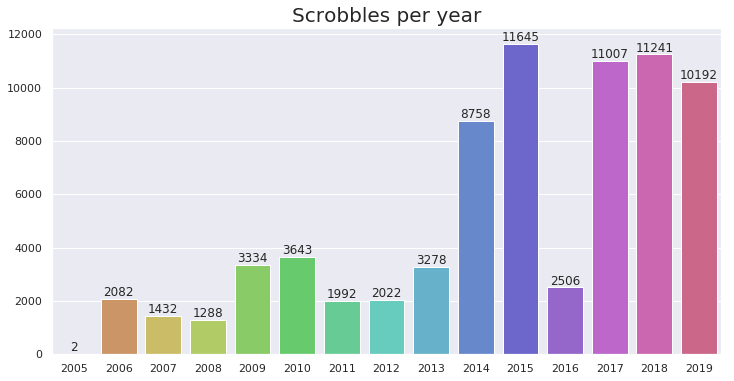

In [20]:
years = sorted(list(scrobbles_df['Year'].unique()))
tracks_per_year = [len(scrobbles_df[scrobbles_df['Year'] == i]) for i in years]

palette_years = sns.color_palette("hls", len(years))

sns.set()
plt.subplots(figsize=(12, 6))
yearly_tracks = sns.barplot(years, tracks_per_year, palette=palette_years)
yearly_tracks.set_title('Scrobbles per year', fontsize=20)
for p in yearly_tracks.patches:
    yearly_tracks.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

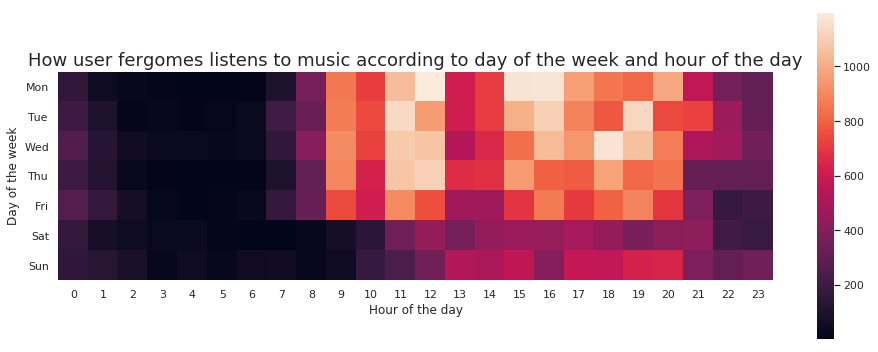

In [21]:
matrix_hour_weekday = scrobbles_df.pivot_table(index='Weekday_number', 
               columns='Hour',
               aggfunc='size',
               fill_value=0)

f, ax = plt.subplots(figsize=(16, 6))
heatmat_hour_weekday = sns.heatmap(matrix_hour_weekday, square=True,
                                   yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
title = 'How user ' + str(user) + ' listens to music according to day of the week and hour of the day'
heatmat_hour_weekday.set_title(title, fontsize=18)
plt.yticks(rotation=0)
plt.xlabel("Hour of the day")
plt.ylabel("Day of the week")
plt.show()

As per the heatmap above, I'm a person that listens to music mostly during working days and hours. As I work at an office and have regular working hours, we can see that I still listen to music when at home during the night.

_Soundtrack for this first part of the study: [The Blossoms](https://open.spotify.com/album/0yO5Mwu2oDdGbeRFpAaBGa?si=yxsQbO8eStmMsBK7eDVvMA)_

![Blossoms](https://i.imgur.com/KHt35a8b.jpg)

### Obsessions over time

Now I want to know the tracks that were on repeat for every year.

But the first question is: am I a obsession-track-on-repeat? There are people that clearly listens to the same track over and over when they are in love with it, but am I like this? We have to analyze it.

How many times do I have to listen to the same track to say it's an obsession?

We'll run some studies.

In [22]:
scrobbles_per_year = {}

for i in years:
    scrobbles_per_year['tracks_' + str(i)] = scrobbles_df.loc[scrobbles_df['Year'] == i]

In [23]:
dict_top_tracks = {}
for key, value in scrobbles_per_year.items():
    count = 0
    old_track = ''
    dict_tracks_per_year = {}
    for i in range(len(value['Track'])):
        new_track = value.iloc[i]['Track']
        if old_track == new_track:
            count += 1
            if count > 2: dict_tracks_per_year[(value.iloc[i]['Artist'], value.iloc[i]['Track'])] = count
        else:
            count = 0
        old_track = new_track
    sorted_dict = sorted(dict_tracks_per_year.items(), key=lambda x: x[1], reverse=True)
    dict_top_tracks[key[-4:]] = sorted_dict[:5]

In [24]:
for key, value in dict_top_tracks.items():
    if len(value) > 0:
        print('In', key, 'the most listened tracks on repeat were:')
        for item in value:
            print('"' + item[0][1] + '" by', item[0][0], item[1], 'times')
        print('')

In 2007 the most listened tracks on repeat were:
"The Mating Game" by Bitter:Sweet 3 times

In 2009 the most listened tracks on repeat were:
"Vlad the Impaler" by Kasabian 13 times
"Club Foot" by Kasabian 10 times
"Ladies & Gentlemen (Roll The Dice)" by Kasabian 8 times
"Breakout" by Foo Fighters 8 times
"L.S.F. (Lost Souls Forever)" by Kasabian 7 times

In 2010 the most listened tracks on repeat were:
"Sinking Friendships" by Jónsi 8 times
"Boy Lilikoi" by Jónsi 8 times
"Animal Arithmetic" by Jónsi 8 times
"Go Do" by Jónsi 8 times
"Kolnidur" by Jónsi 6 times

In 2011 the most listened tracks on repeat were:
"The Roller" by Beady Eye 12 times
"Millionaire" by Beady Eye 12 times
"Beatles and Stones" by Beady Eye 12 times
"Bring the Light" by Beady Eye 11 times
"For Anyone" by Beady Eye 11 times

In 2012 the most listened tracks on repeat were:
"Teddy Picker" by Arctic Monkeys 8 times
"Who Put the Weight of the World on My Shoulders?" by Oasis 3 times
"Place" by Lucy Rose 3 times
"One Wa

_Soundtrack for this first part of the study: [Modest Mouse](https://open.spotify.com/album/5SbcupirEParczvqqyUPXL?si=DLNp2lX6Q82fDntFRM_fsQ)_

![The Postal Service](https://imgur.com/ImSOx5pt.png)

### Let's analyze a little bit the tags

Now I want to understand what genres I'm listening to. This is given by TAGS on last.fm system. Any user can tag a song/artist/album as they want, so they are not **official** genres but as defined by the users. The top tags of an artist is the one that users tag the most, so although it's not 100% official, it should be precise enough for popular artists.

We will build a vector of tags.

First we will analyze some tags for some artists.

Then we build a list with the unique tags. Then, for each scrobble, it will analyze if the tag is present. If it is, it will flag with 1 (on the position that tag is on the unique tags list) and, if not, with a 0.

In [25]:
scrobbles_df.iloc[0]['Tags']

"['britpop', 'indie', 'rock', 'alternative', 'british', 'indie rock', 'alternative rock', 'scottish', 'pop', 'indie pop', '90s', 'uk', 'male vocalists', 'scotland', 'acoustic', 'pop rock', '00s', 'glasgow']"

For each tag cell, we can see there's a list that is interpreted as a string. We have to turn these strings into actual lists.

Then, we'll build a mega list with all the unique tags for all artists (so later we build a matrix)

In [26]:
import ast

# I analyzed the tags beforehand and checked that these tags below only bring noise and not any value for our study,
# so we'll exclude them from our mega list
list_short = ['uk', 'mpb', 'pop', '20s', '30s','40s', '50s', '60s', '70s', '80s', '90s', '00s', '10s', 
              'emo', 'mod', 'rap', 'rnb', 'usa', 'dub', 'ska', 'r&b', 'idm', 'edm']
all_tags = []

for i in range(len(scrobbles_df)):
    tag_list = ast.literal_eval(scrobbles_df['Tags'][i])
    for j in tag_list:
        if len(j) > 3 or j in list_short:
            if j not in all_tags:
                all_tags.append(j)

In [27]:
def make_user_interest_vector(user_interests):
    """ given a list of interests, produce a vector whose ith element iss 1
    if unique_interests[i] is in the list, 0 otherwise """
    return [1 if interest in user_interests else 0
            for interest in all_tags]

In [28]:
supreme_list_tags_vector = []

for i in range(len(scrobbles_df)):
    list_tags = ast.literal_eval(scrobbles_df['Tags'][i])
    tag_vector = make_user_interest_vector(list_tags)
    supreme_list_tags_vector.append(tag_vector)  


In [29]:
scrobbles_df['TagsVector'] = supreme_list_tags_vector

_Soundtrack for this first part of the study: [Band of Horses](https://open.spotify.com/album/08fkw9uDP2KET6cPIl74Xo?si=YedcmWXjSuKg4ddN5saUfQ)_

![Band of Horses](https://i.imgur.com/r9aLICc.jpg?1)

Now we'll use K Means (using sklearn) to cluster similar artists according to the tags they have. We will define 10 clusters and see how they are grouped.

In [39]:
from sklearn.cluster import KMeans

num_clusters = 10

km = KMeans(n_clusters=num_clusters, n_jobs=2)

%time km.fit(supreme_list_tags_vector)

clusters = km.labels_.tolist()

CPU times: user 1min 13s, sys: 15.7 s, total: 1min 28s
Wall time: 15min 39s


Here we create a dictionary of artist and its cluster assignment.

In [40]:
artists = { 'artist': list(scrobbles_df['Artist']), 'cluster': clusters}

In [41]:
frame = pd.DataFrame(artists, index = [clusters] , columns = ['artist', 'cluster'])

In [42]:
frame['cluster'].value_counts() # number of scrobbles per cluster (clusters from 0 to 4)

6    17018
5    13295
3     8651
0     8258
1     8017
2     5702
9     3798
8     3772
7     3421
4     2490
Name: cluster, dtype: int64

Here is some indexing and sorting on each cluster to identify which are the top n (I chose n=6) words that are nearest to the cluster centroid. This gives a good sense of the main topic of the cluster.

In [43]:
print("Top tags per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
dict_cluster_tags = {}
dict_cluster_artists = {}

for i in range(num_clusters):
    list_titles = []
    print("\nCluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]:
        print(' %s' % all_tags[ind], end=',')
        try: dict_cluster_tags[i].append(all_tags[ind])
        except: dict_cluster_tags[i] = [all_tags[ind]]
    print('\n\n')
    
    print("Cluster %d artists: " % i, end='')
    for title in frame.loc[i]['artist'].values.tolist():
        if title not in list_titles and len(list_titles) <= 50:
            list_titles.append(title)
            try: dict_cluster_artists[i].append(title)
            except: dict_cluster_artists[i] = [title]
    for i in range(0,len(list_titles)):
        print(list_titles[i], end=', ') 
    print("\n\n=======================================================================================") 
    
print('\n\n')

Top tags per cluster:


Cluster 0 words: rock, classic rock, british, 60s, oldies, 70s,


Cluster 0 artists: Mott the Hoople, John Lennon, The Beatles, The Rolling Stones, Small Faces, The Zombies, Tommy James & The Shondells, The Who, The Beach Boys, George Harrison, Fleetwood Mac, The Spencer Davis Group, The Kinks, The Easybeats, UFO, John's Children, The Syn, The Action, The Birds, Paul McCartney, Marc Bolan, The Yardbirds, The Troggs, Them, Status Quo, The Searchers, The Roulettes, The Creation, The Nice, Manfred Mann, Christie, The Equals, Eyes of Blue, Dusty Springfield, Traffic, Cream, The Monkees, Led Zeppelin, Procol Harum, The Kingsmen, Shakin' Stevens, Wings, The Bobby Fuller Four, The Castaways, Shocking Blue, The Animals, Steve Miller Band, Mungo Jerry, Herman's Hermits, Rod Stewart, T. Rex, 


Cluster 1 words: british, rock, alternative, indie, indie rock, alternative rock,


Cluster 1 artists: Cleaners From Venus, Prefab Sprout, Ash, Paul Weller, Jamie T, Dirty Pretty T

_Soundtrack for this first part of the study: [The Postal Service](https://open.spotify.com/album/4ssF0ppdJnMTtL2hg1CLKX?si=dUOpusnlRCOEoyNZ4oAhnA)_

![The Postal Service](https://imgur.com/f5hmnPat.png)

In [44]:
# import json
# import pylast

# def get_credentials():
#     with open("secrets.json", 'r') as file:
#         jsonfile = json.load(file)
#         API_KEY = jsonfile["API"]["API_KEY"]
#         API_SECRET = jsonfile["API"]["API_SECRET"]
#         username = jsonfile["API"]["username"]
#         password = jsonfile["API"]["password_hash"]
#         password_hash = pylast.md5(password)
#     return API_KEY, API_SECRET, username, password, password_hash

# API_KEY, API_SECRET, username, password, password_hash = get_credentials()
# network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET, username=username, password_hash=password_hash)

# import requests
# from collections import defaultdict, Counter

# for i in range(len(dict_cluster_tags)):
#     tags_list = dict_cluster_tags[i]
#     dict_artists_tags = defaultdict(list)
#     megalist = []
#     for tag in tags_list:
#         url = 'http://ws.audioscrobbler.com/2.0/?method=tag.gettopartists&tag=' + tag + '&api_key=' + API_KEY + '&format=json&limit=30'
#         r = requests.get(url)
#         r_json = json.loads(r.content)
#         for a, artist in enumerate(r_json['topartists']['artist']):
#             if artist not in dict_cluster_artists[i]:
#                 megalist.append(artist['name'])
#                 dict_artists_tags[tag].append(artist['name'])
#     c = Counter(megalist).most_common(10)
#     print(dict_cluster_tags[i], '\n', c, '\n\n')

### Simple recomendation

Now that we have our clustered artists, we can try to start recommending new ones (based on the clusters). Let's start using the method "Get Similar Artists" from Last.fm itself.

For a given cluster, we'll get the first 30 artists similar to each artist and rank by how many times the recommended artist appears. On this process, we make sure that the recommended artist is already not on the cluster

In [51]:
all_artists = list(top_artists.keys())

In [52]:
for i in range(len(dict_cluster_tags)):
    tags_list = dict_cluster_artists[i]
    dict_artists_tags = defaultdict(list)
    megalist = []
    for tag in tags_list:
        tag = tag.replace('&', 'and')
        url = 'http://ws.audioscrobbler.com/2.0/?method=artist.getsimilar&artist=' + tag + '&api_key=' + API_KEY + '&format=json&limit=30'
        r = requests.get(url)
        r_json = json.loads(r.content)
        similar_artists = r_json['similarartists']['artist']
        for a, artist in enumerate(similar_artists):
            if artist['name'] not in dict_cluster_artists[i] and artist['name'] not in all_artists:
                megalist.append(artist['name'])
                dict_artists_tags[tag].append(artist['name'])
    c = Counter(megalist).most_common(10)
    print('For cluster with tags: ', end='')
    for item in dict_cluster_tags[i]: print(item, end=', ')
    print('\nSuggestions:')
    for item in c: print('- ', item[0], '(seen', item[1], 'times)')
    print('\n\n')
    

For cluster with tags: rock, classic rock, british, 60s, oldies, 70s, 
Suggestions:
-  The Dave Clark Five (seen 10 times)
-  Cliff Richard (seen 8 times)
-  Sweet (seen 7 times)
-  The McCoys (seen 7 times)
-  Slade (seen 6 times)
-  Badfinger (seen 6 times)
-  Steppenwolf (seen 6 times)
-  Suzi Quatro (seen 6 times)
-  MUD (seen 5 times)
-  John Lennon & Yoko Ono (seen 5 times)



For cluster with tags: british, rock, alternative, indie, indie rock, alternative rock, 
Suggestions:
-  The Wombats (seen 12 times)
-  Catfish and The Bottlemen (seen 11 times)
-  Mystery Jets (seen 10 times)
-  Circa Waves (seen 8 times)
-  The Lightning Seeds (seen 7 times)
-  Echobelly (seen 7 times)
-  Peter Doherty (seen 6 times)
-  Cage the Elephant (seen 6 times)
-  Electronic (seen 5 times)
-  Elastica (seen 5 times)



For cluster with tags: british, indie, uk, alternative, indie rock, rock, 
Suggestions:
-  Friendly Fires (seen 6 times)
-  New Young Pony Club (seen 6 times)
-  Soulwax (seen 5 tim

_Soundtrack for this first part of the study: [Liam Gallagher - Why Me? Why Not.](https://open.spotify.com/album/6iInyjotj1rYpx3vbX0MxX?si=k5tz1UJ3RfGeEFPk4F_1dA)_

![Liam Gallagher](https://imgur.com/uOUASLkt.png)